In [2]:
!python -m spacy download es_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 60.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [3]:

# Proyecto 1
# ----------------------------------------------------------------------------------
# ----------------------------------------------------------------------------------

# =============================== IMPORTS COMUNES ===================================
import os, re, json, glob, unicodedata
from datetime import datetime
from typing import Optional, List, Tuple, Dict, Any

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Colab (para subir archivos si no están en el entorno)
try:
    from google.colab import files  # type: ignore
    IN_COLAB = True
except Exception:
    files = None
    IN_COLAB = False

# NLP básicos
import es_core_news_sm
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords

# ML comunes
from scipy import sparse as sp
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report, accuracy_score, f1_score, precision_recall_fscore_support,
    confusion_matrix, ConfusionMatrixDisplay
)
from sklearn.cluster import KMeans



In [4]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

PROYECTO 1 - Analítica de Textos (Secciones I a IV) - Ejecución lineal (sin main)
El script solicitará explícitamente 'Datos_proyecto.xlsx' y 'Datos de prueba_proyecto.xlsx' cuando corresponda.

################################################################################
SECCIÓN I. Carga de datos (TRAIN) y revisión inicial
################################################################################

SECCIÓN I. Carga de datos (TRAIN) y revisión inicial
[OK] Encontrado: Datos_proyecto.xlsx
[INFO] Hojas encontradas: ['Sheet1']
[INFO] Hoja seleccionada: 'Sheet1' (2424 filas)
[INFO] Forma del DataFrame: (2424, 2)
Sugerencia columna de TEXTO: textos
Sugerencia columna de ETIQUETA: labels

################################################################################
SECCIÓN I.A. Perfilamiento y calidad de datos
################################################################################

SECCIÓN I.A. Perfilamiento y calidad de datos
  columna    tipo  nulos  %_nulos  unicos  \


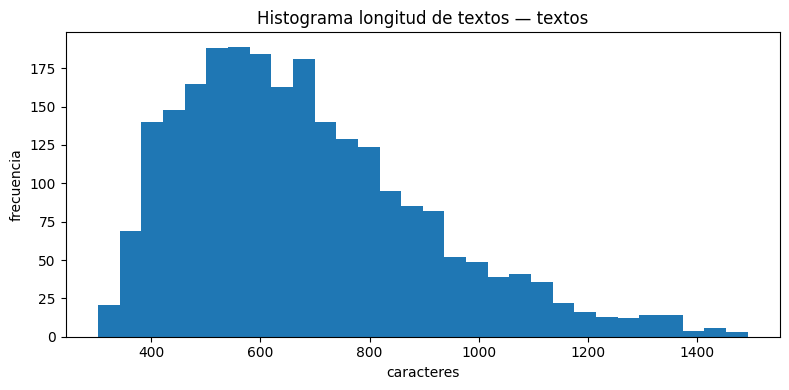


Distribución de clases:
   clase  conteo          %
0     4    1025  42.285479
1     3     894  36.881188
2     1     505  20.833333

################################################################################
SECCIÓN II. Limpieza, preprocesamiento y exploratorio
################################################################################

SECCIÓN II. Limpieza, preprocesamiento y exploratorio
                                        texto_limpio
0  aprendizaje educacion considerar sinonimo esco...
1  nino mas pequeno bebes nino pequeno capacitaci...
2  adema formacion especialista medicina general ...
[TOP UNIGRAMAS] [('mas', 1766), ('salud', 1112), ('pobreza', 1022), ('educacion', 994), ('país', 965), ('poder', 946), ('escuela', 915), ('atencion', 900), ('tener', 821), ('estudiante', 775)]
[TOP BIGRAMAS] [('salud mental', 234), ('atencion primario', 207), ('país ocde', 174), ('mas alto', 158), ('tasa pobreza', 131), ('sistema educativo', 119), ('mas bajo', 116), ('pobreza inf

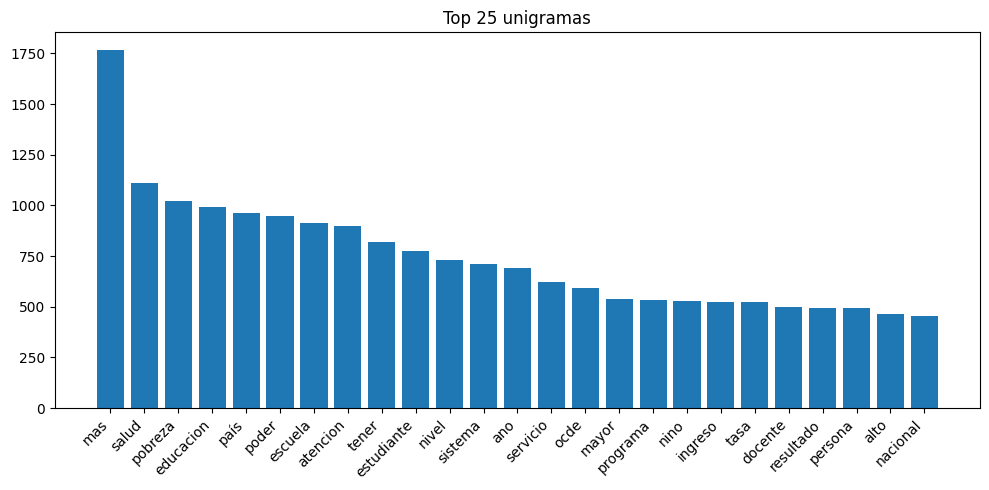

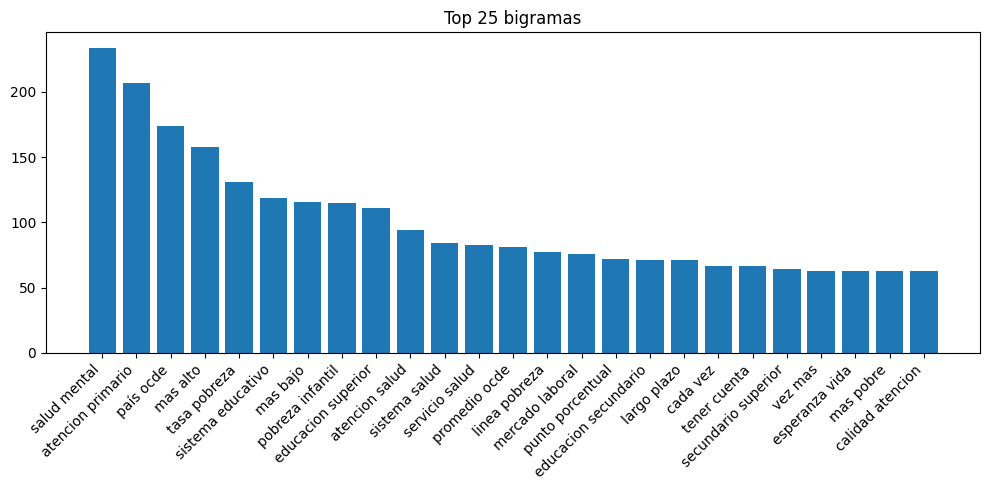

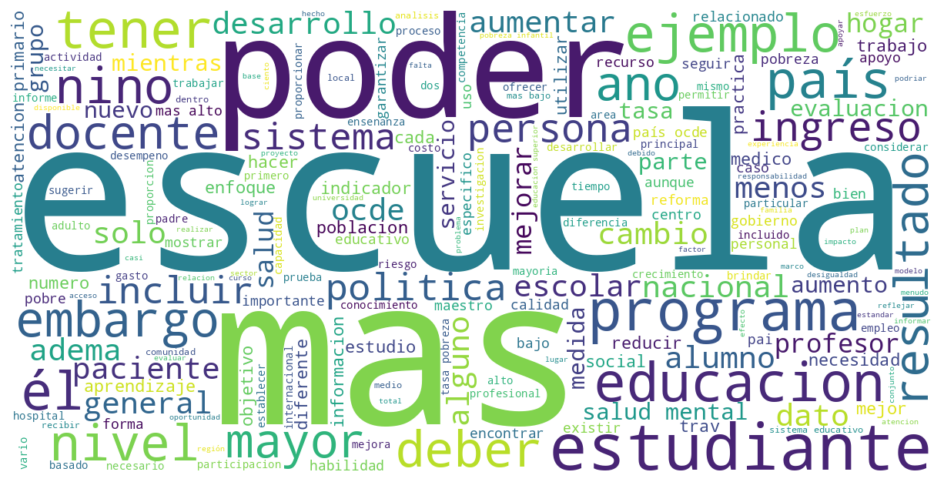


################################################################################
SECCIÓN III. TF-IDF y Modelado (LogReg, LinearSVC, RF+SVD)
################################################################################

SECCIÓN III. TF-IDF y Modelado (LogReg, LinearSVC, RF+SVD)
[INFO] TF-IDF shape: (2424, 20000)

[Logistic Regression]
               precision    recall  f1-score   support

           1       0.96      0.95      0.96       101
           3       0.97      0.97      0.97       179
           4       0.98      0.98      0.98       205

    accuracy                           0.97       485
   macro avg       0.97      0.97      0.97       485
weighted avg       0.97      0.97      0.97       485



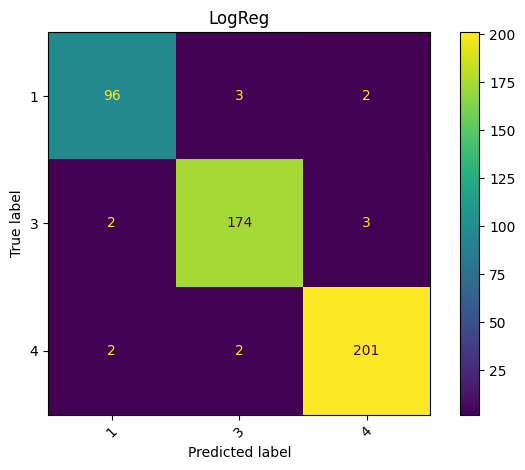


[LinearSVC]
               precision    recall  f1-score   support

           1       0.96      0.95      0.96       101
           3       0.97      0.98      0.98       179
           4       0.99      0.98      0.98       205

    accuracy                           0.98       485
   macro avg       0.97      0.97      0.97       485
weighted avg       0.98      0.98      0.98       485



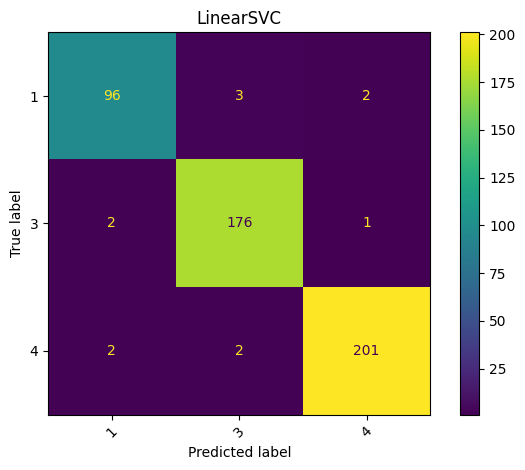


[RandomForest + SVD]
               precision    recall  f1-score   support

           1       0.95      0.87      0.91       101
           3       0.92      0.98      0.95       179
           4       0.98      0.96      0.97       205

    accuracy                           0.95       485
   macro avg       0.95      0.94      0.94       485
weighted avg       0.95      0.95      0.95       485



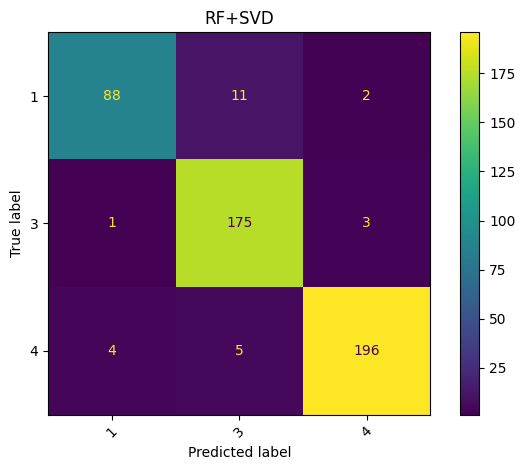


Resumen modelos (BOW):
              modelo  accuracy  f1_weighted  f1_macro
0         LinearSVC  0.975258     0.975240  0.971962
1            LogReg  0.971134     0.971110  0.968464
2  RandomForest_SVD  0.946392     0.946153  0.939560


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]


[Embeddings + LR] (NO participa en selección)
               precision    recall  f1-score   support

           1       0.93      0.96      0.95       101
           3       0.98      0.97      0.97       179
           4       0.99      0.99      0.99       205

    accuracy                           0.97       485
   macro avg       0.97      0.97      0.97       485
weighted avg       0.97      0.97      0.97       485



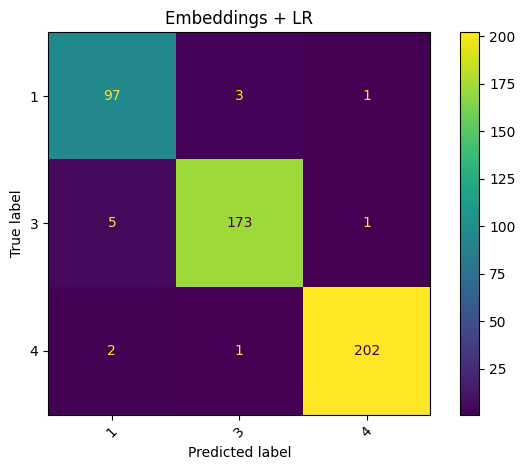

[INFO] Guardado 'resumen_wordemb.csv' (no se descarga automáticamente).

################################################################################
SECCIÓN IV. Etiquetado de archivo de PRUEBA
################################################################################

SECCIÓN IV. Etiquetado de archivo de PRUEBA
[OK] Encontrado: Datos de prueba_proyecto.xlsx
[INFO] Hojas encontradas: ['Sheet1']
[INFO] Hoja seleccionada: 'Sheet1' (152 filas)
[OK] Guardado: Datos_de_prueba_con_prediccion.xlsx


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[FIN] Flujo I-IV ejecutado. Revisa los archivos generados y el log para comentarios.
Log de ejecución: /content/log_ejecucion.txt


In [7]:
# ------------------------------- Configuración global -------------------------------
TRAIN_FILE = "Datos_proyecto.xlsx"
TEST_FILE  = "Datos de prueba_proyecto.xlsx"
LOG_FPATH = "log_ejecucion.txt"
NLP_ES = es_core_news_sm.load(disable=["ner", "parser"])

# -------------------------------------- Utils --------------------------------------
def log(msg: str):
    ts = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    with open(LOG_FPATH, "a", encoding="utf-8") as f:
        f.write(f"[{ts}] {msg}\n")
    print(msg)

def separador(titulo: str):
    print("\n" + "#" * 80)
    print(titulo)
    print("#" * 80 + "\n")
    log(titulo)

def pausa(texto: str="Presiona ENTER para continuar, o escribe 'salir' para terminar: ")->bool:
    # Sin interacción: continuar siempre.
    return True

def download_file_if_colab(path: str):
    """Descarga automática en Colab (silenciosa si no aplica)."""
    if IN_COLAB and files is not None and os.path.exists(path):
        try:
            files.download(path)
        except Exception as e:
            print(f"[WARN] No se pudo descargar {path}: {e}")

def ensure_expected_file(expected_name: str, descripcion: str) -> Optional[str]:
    """
    Verifica si expected_name existe en el directorio actual.
    Si no existe, en Colab solicita subir exactamente ese archivo.
    Si no está en Colab, permite ingresar una ruta manual.
    Devuelve la ruta final o None si no se pudo obtener.
    """
    if os.path.exists(expected_name):
        print(f"[OK] Encontrado: {expected_name}")
        return expected_name

    print(f"[NECESARIO] Falta el archivo requerido: '{expected_name}' → {descripcion}")
    if IN_COLAB and files is not None:
        print(f"[ACCION] Por favor, sube ahora el archivo EXACTO llamado '{expected_name}'.")
        subidos = files.upload()
        # Aceptamos tanto el nombre exacto como si el usuario sube otro y lo renombra
        if isinstance(subidos, dict) and any(k == expected_name for k in subidos.keys()):
            print(f"[OK] Subido: {expected_name}")
            return expected_name
        # Si subió otro .xlsx, intentamos usar el único que haya
        if isinstance(subidos, dict) and len(subidos) == 1:
            alt = list(subidos.keys())[0]
            print(f"[ADVERTENCIA] Se esperaba '{expected_name}', se usará '{alt}' (verifica que corresponda).")
            return alt

    # Ruta manual (única interacción adicional ligada a archivos)
    ruta = input(f"Ingrese la ruta al archivo '{expected_name}' (ENTER para cancelar): ").strip()
    if ruta and os.path.exists(ruta):
        print(f"[OK] Usando: {ruta}")
        return ruta

    print(f"[FALTA] No se obtuvo '{expected_name}'.")
    return None

def read_excel_biggest_sheet(path:str)->pd.DataFrame:
    xls = pd.ExcelFile(path)
    print(f"[INFO] Hojas encontradas: {xls.sheet_names}")
    best_sheet, best_len = None, -1
    for sh in xls.sheet_names:
        tmp = pd.read_excel(xls, sh)
        if len(tmp) > best_len:
            best_len, best_sheet = len(tmp), sh
    print(f"[INFO] Hoja seleccionada: '{best_sheet}' ({best_len} filas)")
    return pd.read_excel(xls, best_sheet)

def _avg_len(s: pd.Series)->float:
    return s.dropna().astype(str).map(len).mean() if len(s) else 0.0

# ----------------------------------- Limpieza NLP -----------------------------------
def normalize_text(text: str)->str:
    if not isinstance(text, str):
        text = str(text) if text is not None else ""
    text = text.lower()
    text = re.sub(r"http\S+|www\.\S+", " ", text)
    text = re.sub(r"\S+@\S+\.\S+", " ", text)
    text = re.sub(r"@[A-Za-z0-9_]+", " ", text)
    text = re.sub(r"#[A-Za-z0-9_]+", " ", text)
    text = re.sub(r"\d+", " ", text)
    text = unicodedata.normalize("NFKD", text).encode("ascii", "ignore").decode("utf-8", "ignore")
    text = re.sub(r"[^\w\s]", " ", text, flags=re.UNICODE)
    text = re.sub(r"\s+", " ", text).strip()
    return text

def preprocess_series(texts: pd.Series, extra_stopwords: Optional[List[str]]=None)->Tuple[pd.Series, List[List[str]]]:
    base = set(stopwords.words("spanish"))
    base = {w for w in base if w not in {"no","nunca","jamas","nadie","ninguno"}}
    base.update({"si","asi","tampoco","tambien","ser","estar","haber"})
    if extra_stopwords:
        base.update([w.strip().lower() for w in extra_stopwords if w.strip()])

    cleaned = texts.fillna("").astype(str).map(normalize_text)
    tokens_list: List[List[str]] = []
    for t in cleaned:
        doc = NLP_ES(t)
        toks = [tok.lemma_.strip() for tok in doc if tok.is_alpha]
        toks = [w for w in toks if w and w not in base and len(w) > 2]
        tokens_list.append(toks)
    cleaned_joined = pd.Series([" ".join(toks) for toks in tokens_list], index=texts.index)
    return cleaned_joined, tokens_list

# ---------------------------------- Exploratorio ------------------------------------
def most_common_terms(tokens_list: List[List[str]], topn: int=25)->List[Tuple[str,int]]:
    from collections import Counter
    counter = Counter()
    for toks in tokens_list:
        counter.update(toks)
    return counter.most_common(topn)

def most_common_bigrams(tokens_list: List[List[str]], topn: int=25)->List[Tuple[str,int]]:
    from collections import Counter
    counter = Counter()
    for toks in tokens_list:
        for i in range(len(toks)-1):
            counter[f"{toks[i]} {toks[i+1]}"] += 1
    return counter.most_common(topn)

def plot_bars(pairs: List[Tuple[str, int]], title: str, filename: Optional[str]=None):
    labels = [p[0] for p in pairs]
    vals = [p[1] for p in pairs]
    plt.figure(figsize=(10, 5))
    plt.bar(range(len(vals)), vals)
    plt.xticks(range(len(labels)), labels, rotation=45, ha="right")
    plt.title(title)
    plt.tight_layout()
    if filename:
        plt.savefig(filename, dpi=150, bbox_inches="tight")
    plt.show()

def generar_wordcloud(tokens_list: List[List[str]], filename: Optional[str]=None):
    text = " ".join([" ".join(toks) for toks in tokens_list if toks])
    wc = WordCloud(width=1200, height=600, background_color="white")
    wc.generate(text)
    plt.figure(figsize=(12, 6))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    if filename:
        plt.savefig(filename, dpi=150, bbox_inches="tight")
    plt.show()

# =============================== FLUJO I → II → III → IV =============================
print("=" * 80)
print("PROYECTO 1 - Analítica de Textos (Secciones I a IV) - Ejecución lineal (sin main)")
print("El script solicitará explícitamente 'Datos_proyecto.xlsx' y 'Datos de prueba_proyecto.xlsx' cuando corresponda.")
print("=" * 80)

# I) CARGA Y REVISIÓN
separador("SECCIÓN I. Carga de datos (TRAIN) y revisión inicial")
train_path = ensure_expected_file(TRAIN_FILE, "Archivo PRINCIPAL de entrenamiento (textos + etiqueta).")
if not train_path:
    raise SystemExit(f"[FATAL] No se proporcionó '{TRAIN_FILE}'.")

df = read_excel_biggest_sheet(train_path)
log(f"[INFO] Forma del DataFrame: {df.shape}")

# Sugerencia de columnas (sin pedir input)
obj_cols = [c for c in df.columns if df[c].dtype == "object" or pd.api.types.is_string_dtype(df[c])]
col_texto_sug = max(obj_cols, key=lambda c: _avg_len(df[c])) if obj_cols else None

candidatas = [(c, df[c].nunique(dropna=True)) for c in df.columns]
candidatas = [(c, n) for c, n in candidatas if 2 <= n <= 50]
candidatas.sort(key=lambda x: x[1])
col_label_sug = candidatas[0][0] if candidatas else None

print(f"Sugerencia columna de TEXTO: {col_texto_sug}")
print(f"Sugerencia columna de ETIQUETA: {col_label_sug}")

# Selección automática (sin interacción)
col_texto = col_texto_sug
col_label = col_label_sug
if col_texto not in df.columns:
    raise SystemExit(f"[FATAL] La columna de texto '{col_texto}' no existe.")
if col_label and col_label not in df.columns:
    print("[ADVERTENCIA] Columna de etiqueta inválida. Se continúa sin etiqueta.")
    col_label = None

# --- PERFILAMIENTO Y CALIDAD DE DATOS (automático, sin interacción) ---
separador("SECCIÓN I.A. Perfilamiento y calidad de datos")

# Tabla por columna: tipo, nulos, %nulos, únicos, ejemplo
perfil_cols = pd.DataFrame({
    "columna": df.columns,
    "tipo": [str(df[c].dtype) for c in df.columns],
    "nulos": [int(df[c].isna().sum()) for c in df.columns],
    "%_nulos": [float(df[c].isna().mean()*100) for c in df.columns],
    "unicos": [int(df[c].nunique(dropna=True)) for c in df.columns],
    "ejemplo": [str(next((v for v in df[c].dropna().head(1).tolist()), ""))[:80] for c in df.columns],
})
perfil_cols.to_csv("perfil_columnas.csv", index=False, encoding="utf-8")
print(perfil_cols.head(12))

# Resumen de calidad: filas, columnas, duplicados
duplicados = int(df.duplicated().sum())
resumen_calidad = pd.DataFrame([{
    "filas": int(len(df)),
    "columnas": int(len(df.columns)),
    "duplicados": duplicados,
    "%_duplicados": float(duplicados/len(df)*100 if len(df) else 0.0),
}])
resumen_calidad.to_csv("resumen_calidad.csv", index=False, encoding="utf-8")
print("\nResumen de calidad:\n", resumen_calidad)

# Longitud del texto (sobre columna original sugerida)
if col_texto is not None:
    lens = df[col_texto].fillna("").astype(str).str.len()
    long_resumen = pd.DataFrame([{
        "min": int(lens.min()) if len(lens) else 0,
        "p25": float(lens.quantile(0.25)) if len(lens) else 0.0,
        "p50": float(lens.quantile(0.50)) if len(lens) else 0.0,
        "p75": float(lens.quantile(0.75)) if len(lens) else 0.0,
        "max": int(lens.max()) if len(lens) else 0,
        "media": float(lens.mean()) if len(lens) else 0.0,
    }])
    long_resumen.to_csv("longitud_texto_resumen.csv", index=False, encoding="utf-8")
    print("\nLongitud de textos (caracteres) — columna:", col_texto)
    print(long_resumen)

    # Histograma (PNG)
    plt.figure(figsize=(8,4))
    plt.hist(lens, bins=30)
    plt.title(f"Histograma longitud de textos — {col_texto}")
    plt.xlabel("caracteres"); plt.ylabel("frecuencia"); plt.tight_layout()
    plt.savefig("hist_longitud_texto.png", dpi=150, bbox_inches="tight")
    plt.show()

# Distribución de clases (si existe etiqueta)
if col_label:
    dist = df[col_label].astype(str).value_counts(dropna=False).rename_axis("clase").reset_index(name="conteo")
    dist["%"] = dist["conteo"] / dist["conteo"].sum() * 100
    dist.to_csv("distribucion_clases.csv", index=False, encoding="utf-8")
    print("\nDistribución de clases:\n", dist)

# II) PREPROCESAMIENTO + EXPLORATORIO
separador("SECCIÓN II. Limpieza, preprocesamiento y exploratorio")
extra_sw = None  # sin interacción
cleaned, tokens_list = preprocess_series(df[col_texto], extra_stopwords=extra_sw)
df2 = df.copy(); df2["texto_limpio"] = cleaned
print(df2[["texto_limpio"]].head(3))

# Exploratorio rápido (parámetros por defecto, sin interacción)
topn = 25
uni = most_common_terms(tokens_list, topn=topn)
bi  = most_common_bigrams(tokens_list, topn=topn)
print("[TOP UNIGRAMAS]", uni[:10])
print("[TOP BIGRAMAS]", bi[:10])
plot_bars(uni, f"Top {topn} unigramas", "top_unigramas.png")
plot_bars(bi,  f"Top {topn} bigramas",   "top_bigramas.png")
generar_wordcloud(tokens_list, filename="wordcloud.png")

# III) TF-IDF + Modelado/Evaluación
separador("SECCIÓN III. TF-IDF y Modelado (LogReg, LinearSVC, RF+SVD)")

max_feat = 20000  # sin interacción
vect = TfidfVectorizer(max_features=max_feat, ngram_range=(1,2), sublinear_tf=True)
X = vect.fit_transform(df2["texto_limpio"].astype(str))
print(f"[INFO] TF-IDF shape: {X.shape}")

resumen_IV: Dict[str, Any] = {"tfidf_shape": list(X.shape)}

if col_label:
    y = df[col_label].astype(str)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # --- Modelo 1: Logistic Regression ---
    from sklearn.linear_model import LogisticRegression
    lr = LogisticRegression(max_iter=2000, class_weight="balanced")
    lr.fit(X_train, y_train)
    y_pred_lr = lr.predict(X_test)
    print("\n[Logistic Regression]\n", classification_report(y_test, y_pred_lr, zero_division=0))
    cm = confusion_matrix(y_test, y_pred_lr, labels=np.unique(y_test))
    ConfusionMatrixDisplay(cm, display_labels=np.unique(y_test)).plot(xticks_rotation=45); plt.title("LogReg"); plt.tight_layout(); plt.show()

    # --- Modelo 2: LinearSVC ---
    from sklearn.svm import LinearSVC
    svc = LinearSVC(C=1.0)
    svc.fit(X_train, y_train)
    y_pred_svc = svc.predict(X_test)
    print("\n[LinearSVC]\n", classification_report(y_test, y_pred_svc, zero_division=0))
    cm = confusion_matrix(y_test, y_pred_svc, labels=np.unique(y_test))
    ConfusionMatrixDisplay(cm, display_labels=np.unique(y_test)).plot(xticks_rotation=45); plt.title("LinearSVC"); plt.tight_layout(); plt.show()

    # --- Modelo 3: RandomForest + SVD ---
    from sklearn.decomposition import TruncatedSVD
    from sklearn.ensemble import RandomForestClassifier
    n_comp = 300  # sin interacción
    svd = TruncatedSVD(n_components=n_comp, random_state=42)
    X_train_svd = svd.fit_transform(X_train); X_test_svd = svd.transform(X_test)

    rf = RandomForestClassifier(
        n_estimators=400, max_depth=None, min_samples_leaf=1,
        class_weight="balanced_subsample", n_jobs=-1, random_state=42
    )
    rf.fit(X_train_svd, y_train)
    y_pred_rf = rf.predict(X_test_svd)
    print("\n[RandomForest + SVD]\n", classification_report(y_test, y_pred_rf, zero_division=0))
    cm = confusion_matrix(y_test, y_pred_rf, labels=np.unique(y_test))
    ConfusionMatrixDisplay(cm, display_labels=np.unique(y_test)).plot(xticks_rotation=45); plt.title("RF+SVD"); plt.tight_layout(); plt.show()

    # Resumen comparativo (SOLO BOW)
    resumen = pd.DataFrame([
        {"modelo":"LogReg","accuracy":accuracy_score(y_test, y_pred_lr),"f1_weighted":f1_score(y_test, y_pred_lr, average="weighted"),"f1_macro":f1_score(y_test, y_pred_lr, average="macro")},
        {"modelo":"LinearSVC","accuracy":accuracy_score(y_test, y_pred_svc),"f1_weighted":f1_score(y_test, y_pred_svc, average="weighted"),"f1_macro":f1_score(y_test, y_pred_svc, average="macro")},
        {"modelo":"RandomForest_SVD","accuracy":accuracy_score(y_test, y_pred_rf),"f1_weighted":f1_score(y_test, y_pred_rf, average="weighted"),"f1_macro":f1_score(y_test, y_pred_rf, average="macro")},
    ]).sort_values("f1_weighted", ascending=False).reset_index(drop=True)
    print("\nResumen modelos (BOW):\n", resumen)
    resumen.to_csv("resumen_modelos.csv", index=False, encoding="utf-8")
    # ↓↓↓ Descarga automática SOLO del archivo de resumen ↓↓↓
    download_file_if_colab("resumen_modelos.csv")

    # --- Modelo 4 (OPCIONAL/BONO): Word Embeddings + LogisticRegression --------------
    # NOTA: Este modelo NO participa en la selección del mejor; es informativo y va al final.
    try:
        from sklearn.linear_model import LogisticRegression as _LR_EMB
        try:
            from sentence_transformers import SentenceTransformer
        except Exception:
            SentenceTransformer = None

        if SentenceTransformer is None:
            print("[Embeddings] 'sentence-transformers' no está disponible. Modelo de embeddings omitido.")
        else:
            emb_model_name = "paraphrase-multilingual-MiniLM-L12-v2"  # multilingüe liviano (384D)
            st_model = SentenceTransformer(emb_model_name)

            X_train_texts = df2.loc[y_train.index, "texto_limpio"].astype(str).tolist()
            X_test_texts  = df2.loc[y_test.index,  "texto_limpio"].astype(str).tolist()
            X_train_emb = st_model.encode(X_train_texts, show_progress_bar=False, normalize_embeddings=True)
            X_test_emb  = st_model.encode(X_test_texts,  show_progress_bar=False, normalize_embeddings=True)

            lr_emb = _LR_EMB(max_iter=2000, class_weight="balanced")
            lr_emb.fit(X_train_emb, y_train)
            y_pred_emb = lr_emb.predict(X_test_emb)

            print("\n[Embeddings + LR] (NO participa en selección)\n",
                  classification_report(y_test, y_pred_emb, zero_division=0))
            cm = confusion_matrix(y_test, y_pred_emb, labels=np.unique(y_test))
            ConfusionMatrixDisplay(cm, display_labels=np.unique(y_test)).plot(xticks_rotation=45)
            plt.title("Embeddings + LR"); plt.tight_layout(); plt.show()

            resumen_wordemb = pd.DataFrame([{
                "modelo":"Embeddings_LR",
                "accuracy":accuracy_score(y_test, y_pred_emb),
                "f1_weighted":f1_score(y_test, y_pred_emb, average="weighted"),
                "f1_macro":f1_score(y_test, y_pred_emb, average="macro")
            }])
            resumen_wordemb.to_csv("resumen_wordemb.csv", index=False, encoding="utf-8")
            print("[INFO] Guardado 'resumen_wordemb.csv' (no se descarga automáticamente).")
    except Exception as e:
        print(f"[Embeddings] Omitido por error: {e}")

# IV) Etiquetar archivo de PRUEBA (archivo específico)
separador("SECCIÓN IV. Etiquetado de archivo de PRUEBA")

if col_label:
    test_path = ensure_expected_file(TEST_FILE, "Archivo de PRUEBA para predecir etiquetas con el mejor modelo.")
    if test_path:
        df_test = read_excel_biggest_sheet(test_path)
        col_txt_test = col_texto if col_texto in df_test.columns else (
            df_test.select_dtypes(include=["object"]).columns.tolist()[0] if len(df_test.select_dtypes(include=["object"]).columns) else None
        )
        if col_txt_test is None:
            print("[ADVERTENCIA] No se encontró columna de texto en el archivo de prueba.")
        else:
            cleaned_test, _ = preprocess_series(df_test[col_txt_test], extra_stopwords=extra_sw)
            # Elegimos el mejor modelo por F1_weighted del resumen (SOLO BOW)
            best = pd.read_csv("resumen_modelos.csv").iloc[0]["modelo"]
            if best == "RandomForest_SVD":
                # reentrenar con TODO + SVD
                from sklearn.decomposition import TruncatedSVD
                from sklearn.ensemble import RandomForestClassifier
                svd_full = TruncatedSVD(n_components=300, random_state=42)
                X_all_svd = svd_full.fit_transform(vect.transform(df2['texto_limpio'].astype(str)))
                rf = RandomForestClassifier(
                    n_estimators=400, max_depth=None, min_samples_leaf=1,
                    class_weight="balanced_subsample", n_jobs=-1, random_state=42
                )
                rf.fit(X_all_svd, y)
                X_test_full_svd = svd_full.transform(vect.transform(cleaned_test.astype(str)))
                yhat = rf.predict(X_test_full_svd)
            elif best == "LogReg":
                from sklearn.linear_model import LogisticRegression
                lr_full = LogisticRegression(max_iter=2000, class_weight="balanced")
                lr_full.fit(vect.transform(df2['texto_limpio'].astype(str)), y)
                yhat = lr_full.predict(vect.transform(cleaned_test.astype(str)))
            else:
                from sklearn.svm import LinearSVC
                svc_full = LinearSVC(C=1.0)
                svc_full.fit(vect.transform(df2['texto_limpio'].astype(str)), y)
                yhat = svc_full.predict(vect.transform(cleaned_test.astype(str)))

            df_test["prediccion_modelo"] = yhat
            out_xlsx = "Datos_de_prueba_con_prediccion.xlsx"
            df_test.to_excel(out_xlsx, index=False)
            print(f"[OK] Guardado: {out_xlsx}")
            # ↓↓↓ Descarga automática SOLO del archivo final de predicción ↓↓↓
            download_file_if_colab(out_xlsx)
    else:
        print(f"[OMITIDO] No se proporcionó '{TEST_FILE}'.")
else:
    # Sin etiqueta → Clustering básico (sin interacción)
    vect2 = TfidfVectorizer(max_features=20000, ngram_range=(1,2), sublinear_tf=True)
    X2 = vect2.fit_transform(df2["texto_limpio"].tolist())
    k = 3
    km = KMeans(n_clusters=k, random_state=42, n_init=10).fit(X2.toarray())
    print("[INFO] Clustering completado.")

print("=" * 80)
print("[FIN] Flujo I-IV ejecutado. Revisa los archivos generados y el log para comentarios.")
print(f"Log de ejecución: {os.path.abspath(LOG_FPATH)}")
print("=" * 80)